In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_preview')
df

,crop,moisture,temp,pump
0,cotton,758,45,0
1,cotton,996,20,1
2,cotton,395,45,1
3,cotton,798,45,1
4,cotton,713,19,1
...,...,...,...,...
4995,cotton,846,45,1
4996,cotton,1013,33,0
4997,cotton,570,24,0
4998,cotton,1008,13,1


In [3]:
df['pump'].value_counts()

1    3501
0    1499
Name: pump, dtype: int64

In [4]:
df = df.drop(columns=['crop'])

In [5]:
df

,moisture,temp,pump
0,758,45,0
1,996,20,1
2,395,45,1
3,798,45,1
4,713,19,1
...,...,...,...
4995,846,45,1
4996,1013,33,0
4997,570,24,0
4998,1008,13,1


In [6]:

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [8]:
X_train

array([[1022,   23],
       [   4,   26],
       [ 909,   29],
       ...,
       [ 869,   16],
       [   4,   44],
       [1022,   35]])

In [9]:
y_train

array([1, 0, 1, ..., 1, 1, 1])

In [10]:
class Perceptron_adam_BCE:
    def __init__(self, learning_rate=0.001, num_epochs=2000, decay_rate1=0.9,decay_rate2 = 0.999, epsilon=1e-7):
        self.bias = None
        self.weights = None
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.decay_rate1 = decay_rate1
        self.decay_rate2 = decay_rate2
        self.epsilon = epsilon
        self.moving_avg_sq_b = 0
        self.moving_avg_sq_w = 0
        self.first_momentum_w = 0
        self.first_momentum_b = 0


    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))


    def predicted(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        pred = self.sigmoid(linear_model)
        return pred


    def fit(self, X, y):

        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        prev_v_w,prev_v_b,gamma = 0,0,0.9
        for i in range(self.num_epochs):
            y_pred = self.predicted(X)
            term = y_pred - y
            dw = (1 / num_samples) * np.dot(X.T, term)
            db = (1 / num_samples) * np.sum(term)


            # Update the moving average of squared gradients
            self.moving_avg_sq_w = self.decay_rate2 * self.moving_avg_sq_w + (1 - self.decay_rate2) * (dw ** 2)
            self.moving_avg_sq_b = self.decay_rate2 * self.moving_avg_sq_b + (1 - self.decay_rate2) * (db ** 2)

            self.first_momentum_w = self.decay_rate1 * self.first_momentum_w + (1 - self.decay_rate1)*dw
            self.first_momentum_b = self.decay_rate1 * self.first_momentum_b + (1 - self.decay_rate1)*db


            # Update weights and bias using  adam
            self.weights -= (self.learning_rate / (np.sqrt(self.moving_avg_sq_w + self.epsilon))) * self.first_momentum_w
            self.bias -= (self.learning_rate / (np.sqrt(self.moving_avg_sq_b + self.epsilon))) * self.first_momentum_b

    def test(self, X):
        Y_predtest = self.predicted(X)
        Y_values = Y_predtest
        correct = 0
        for i in range(len(Y_predtest)):
            if Y_predtest[i] > 0.5:
                Y_predtest[i] = 1
            else:
                Y_predtest[i] = 0
        return Y_predtest


In [11]:
n_trees = 100
trees = []
for i in range(n_trees):
    indices = np.random.choice(X_train.shape[0],size=75,replace=True)
    X_bootstrap = X_train[indices]
    y_bootstrap = y_train[indices]
    model1 = Perceptron_adam_BCE()
    model1.fit(X_bootstrap,y_bootstrap)
    trees.append(model1)

In [12]:
predictions = [tree.test(X_test) for tree in trees]
y_pred = np.round(np.mean(predictions, axis=0))
print(y_pred)


[1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.

In [13]:
print(y_test)

[1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0
 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0
 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1
 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0
 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1
 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1
 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 0 0 1 1 0 0 0 1 0 0 0 

In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test,y_pred)
print(cm)
print(ac)


[[124 170]
 [ 57 649]]
0.773


### Pickling

In [15]:
from joblib import dump
dump(trees,'RandomForestClassifier2')

['RandomForestClassifier2']

In [16]:
from joblib import load
load_classifier = load('RandomForestClassifier2')

In [176]:
df = pd.read_csv('data.csv')

[]

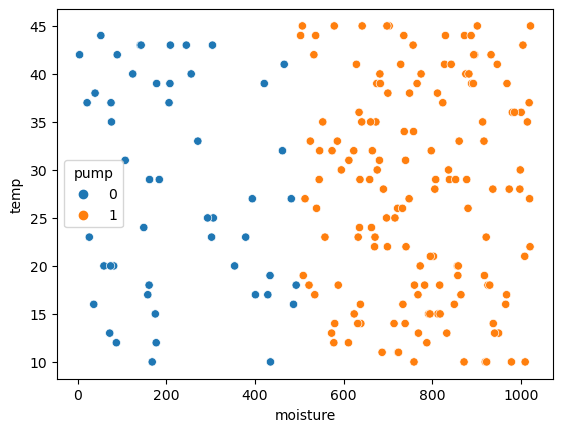

In [177]:
sns.scatterplot(x=df['moisture'], y=df['temp'], hue=df["pump"])
plt.plot()